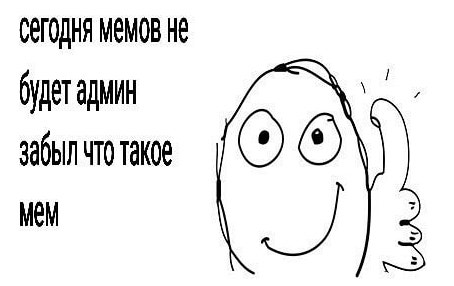

# **Profile** и **Pstats**: анализ производительности

Модуль **profile** предоставляет программные интерфейсы, предназначенные для сбора и анализа статистической информации о потреблении процессорного времени и других ресурсов кодом на языке Python.

# **Запуск профилировщика**

Проще всего начать работу c модулем **profile**, вызвав.функцию run(). Эта функция получает строку инструкции в качестве аргумента и создает отчет, в ко­ тором отображается количество времени, затраченного на выполнение различ­ ных строк кода при обработке данной инструкции.

In [ ]:
#profile_fibonacci_raw.py

import profile

def fib(n):
    if n == 0:
        return 0 
    elif n == 1: 
        return 1
    else:
        return fib(n - 1) + fib(n - 2)

def fib_seq(n): 
    seq = []
    if n > 0:
        seq.extend(fib_seq(n - 1))
    seq.append(fib(n))
    return seq

profile.run('print(fib_seq(20)); print()')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]

         57406 function calls (116 primitive calls) in 0.119 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 :0(acquire)
       25    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.119    0.119 :0(exec)
       20    0.000    0.000    0.000    0.000 :0(extend)
        3    0.000    0.000    0.000    0.000 :0(getpid)
        3    0.000    0.000    0.000    0.000 :0(isinstance)
        2    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
     21/1    0.000    0.000    0.119    0.119 <ipython-input-1-36998acba585>:11(fib_seq)
 57291/21    0.119    0.000    0.119    0.006 <ipython-input-1-36998acba585>:3(fib)
        1    0.000    0.000    0.119    0.119 <string>:1(<module>)
        4    0.000    0.000    0.0

Вышеприведенная рекурсивная версия программы для вычисления последова­ тельности чисел Фибоначчи особенно хорошо подходит для демонстрации воз­ можностей модуля **profile**, поскольку ее производительность может быть зна­ чительно улучшена. В отчете стандартного формата сначала выводятся итоговые данные, а затем подробные сведения для каждой выполнявшейся функции.

# **ЛИСТИНГ** 

In [ ]:
#profile_fibonacci_memoized.py

import functools
import profile

@functools.lru_cache(maxsize=None)
def fib(n):
  if n == 0:
    return 0
  elif n == 1:
    return 1
  else:
    return fib(n - 1) + fib(n - 2)

def fib_seq(n):
  seq = []
  if n > 0:
    seq.extend(fib_seq(n - 1))
  seq.append(fib(n))
  return seq

if __name__ == '__main__' :
  profile.run('print(fib_seq(20)); print()')

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765]

         136 function calls (116 primitive calls) in 0.001 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        4    0.000    0.000    0.000    0.000 :0(acquire)
       25    0.000    0.000    0.000    0.000 :0(append)
        1    0.000    0.000    0.001    0.001 :0(exec)
       20    0.000    0.000    0.000    0.000 :0(extend)
        3    0.000    0.000    0.000    0.000 :0(getpid)
        3    0.000    0.000    0.000    0.000 :0(isinstance)
        2    0.000    0.000    0.000    0.000 :0(print)
        1    0.000    0.000    0.000    0.000 :0(setprofile)
     21/1    0.000    0.000    0.000    0.000 <ipython-input-2-6e17c20c8e08>:13(fib_seq)
       21    0.000    0.000    0.000    0.000 <ipython-input-2-6e17c20c8e08>:4(fib)
        1    0.000    0.000    0.001    0.001 <string>:1(<module>)
        4    0.000    0.000    0.000

Благодаря тому, что числа Фибоначчи запоминаются на каждом уровне, удает­ ся по большей части избавиться от рекурсии и снизить количество вызовов до 89, на что ушло всего лишь 0,001 секунды. Счетчик ncalls для функции fib () указы­ вает на то, что ее рекурсивные вызовы вообще отсутствовали.

# **Выполнение в контексте**

Иногда, вместо того чтобы конструировать сложное выражение для функции run (), легче создать простое выражение и передать ему параметры через кон­ текст, используя функцию runctx ().

In [ ]:
#profile__runctx.py

import profile
from profile_fibonacci_memoized import fib, fib_seq

if __name__ == '__main__' :
  profile.runctx(
    'print(fib_seq(n)); print()',
    globals(),
    {'n': 20},
  )

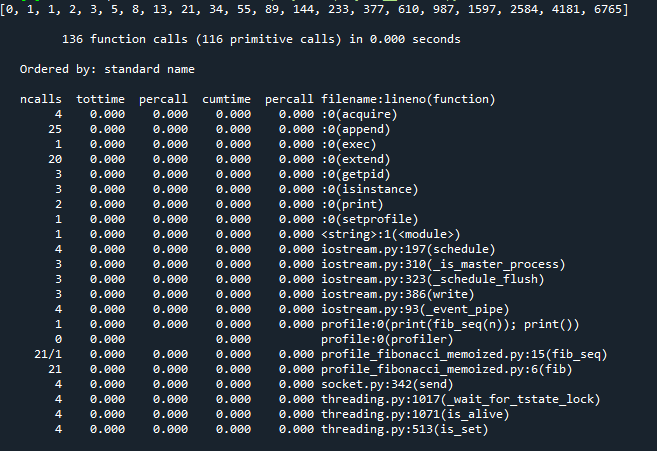

В этом примере значение n передается через контекст локальной перемен­ ной, а не встраивается непосредственно в инструкцию, передаваемую функции runctx() .

# **Pstats: работа со статистиками**

Стандартный отчет, создаваемый функциями модуля **profile**, не особенно гибок. Однако можно создать пользовательский отчет, сохранив исходные данные профилирования, полученные c помощью функций run () и runctx (), и выпол­ нив их отдельную обработку c помощью класса pstats. Stats.
Ниже приведен пример выполнения нескольких итераций одного и того же геста и объединения их результатов.

In [ ]:
#profile_stats.py

import cProfile as profile
import pstats
from profile_fibonacci_memoized import fib, fib_seq

# Создать 5 наборов статистических объектов
for i in range(5):
    filename = 'profile_stats_{}.stats'.format(i)
    profile.run('print({}, fib_seq(20))'.format(i), filename)

# Прочитать все 5 файлов статистик в один объект
stats = pstats.Stats('profile_stats_0.stats')
for i in range(1, 5):
    stats.add('profile_stats_{}.stats'.format(i))
    
# Удалить информацию о путях из имен файлов для отчета
stats.strip_dirs()

# Сортировать статистики по суммарному времени, затраченному на
# выполнение функции
stats.sort_stats('cumulative')

stats.print_stats()


ModuleNotFoundError: ignored

Данные в выходном отчете сортируются в порядке убывания кумулятивного зремени выполнения функции. Имена каталогов удаляются из имен файлов c целью экономии места при их выводе на экран.

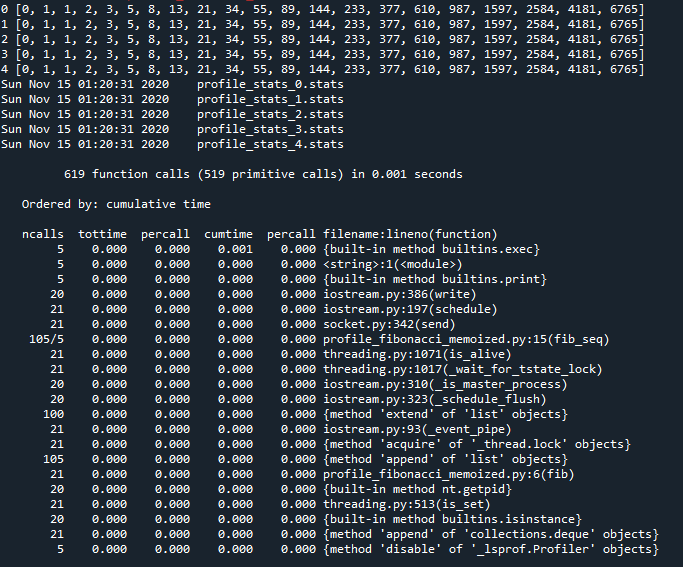

# **Ограничение содержимого отчета**

Вывод можно ограничивать данными, относящимися к определенным функци­ям. В приведенной ниже версии программы ограничение вывода информацией, касающейся только функций fib() и fib_seq(), достигается за счет использо­ вания регулярного выражения для поиска нужных значений имя_файла:номер_ строки (функция).

In [ ]:
#profile_stats_restricted.py

import profile
import pstats
from profile_fibonacci_memoized import fib, fib_seq

# Прочитать все 5 файлов статистик в один объект
stats = pstats.Stats('profile_stats_0.stats')
for i in range(1, 5):
    stats.add('profile_stats_{}.stats'.format(i))
stats.strip_dirs()
stats.sort_stats('cumulative')

# Ограничить вывод строками, содержащими подстроку "(fib"
stats.print_stats('\(fib')

Регулярное выражение включает литеральный символ открывающей круглой скобки (() для сопоставления c той частью местоположения источника данных, которая соответствует имени файла.

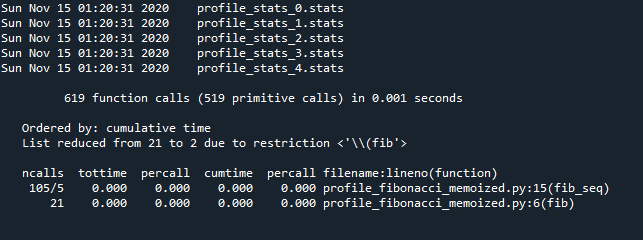

# Графы вызова функций

Объекты статистики имеют методы, обеспечивающие вывод информации об объектах, вызывающих указанную функцию или вызываемых ею.

In [ ]:
#profile_stats_callers.py

import cProfile as profile
import pstats
from profile_fibonacci_memoized import fib, fib_seq

# Прочитать все 5 файлов статистик в один объект
stats = pstats.Stats('profile_stats_0.stats')
for i in range(1, 5):
    stats.add('profile_stats_{}.stats'.format(i))
stats.strip_dirs()
stats.sort_stats('cumulative')

print('INCOMING CALLERS:')
stats.print_callers('\(fib')

print('OUTGOING CALLEES:')
stats.print_callees('\(fib')

Аргументы функций print_callers() и print_callees() работают анало­ гично аргументам ограничения функции print_stats (). В выводе отображается
 информация о вызывающем и вызываемом объектах, количестве вызовов и куму­лятивном времени.

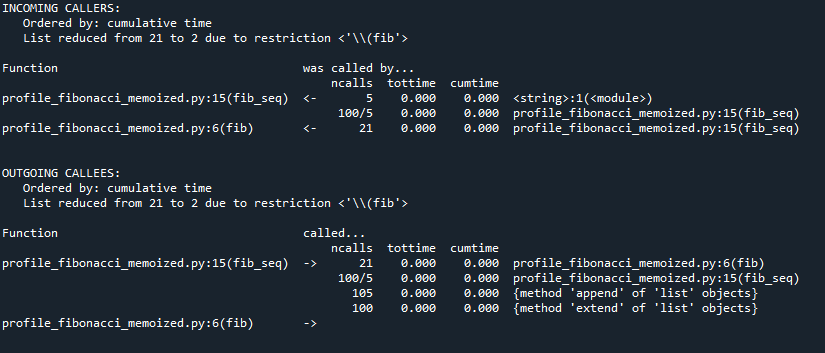

# **timeit: замер времени выполнения небольших фрагментов кода Python**

Модуль **timeit** предоставляет простой интерфейс для определения времени выполнения небольших фрагментов кода Python. Максимально возможная точ­ ность определения длительности промежутков времени обеспечивается за счет использования зависящей от платформы функции time(), а снижение влияния накладных расходов, связанных c запуском и завершением выполняемого кода, достигается за счет его многократного выполнения.

# Содержимое модуля

Модуль **timeit** определяет единственный общедоступный класс: Timer. Конструктор класса Timer получает в качестве аргументов инструкцию, подлежа­ щую хронометрированию, и инструкцию “настройки” (используемую для иници­ ализации переменных). Инструкции Python должны быть строками и могут вклю­ чать встроенные символы новой строки.
Метод timeit() выполняет инструкцию настройки один раз, а затем много­ кратно выполняет основную инструкцию и возвращает количество истекшего времени. Аргумент number метода timeit () позволяет указать, сколько раз необ­ ходимо выполнить инструкцию. Значение по умолчанию — 1000000.

# Базовый пример

В качестве иллюстрации использования различных аргументов конструктора Timer ниже приведен простой пример, в котором выводятся значения, иденти­ фицирующие каждую выполняющуюся инструкцию.

In [ ]:
#timeit_example.py

import timeit

t = timeit.Timer("print('main statement')", "print('setup')")

print('TIMEIT:')
print(t.timeit(2))

print('REPEAT:')
print(t.repeat(3, 2))

TIMEIT:
setup
main statement
main statement
4.662999981519533e-05
REPEAT:
setup
main statement
main statement
setup
main statement
main statement
setup
main statement
main statement
[3.5050000406045e-05, 3.3910000638570637e-05, 3.552999987732619e-05]


В выводе отображаются результаты для многократных вызовов функции print().

Функция **timeit** () выполняет инструкцию настройки один раз, после чего вы­ зывает основную инструкцию count раз. Она возвращает значение в виде числа c плавающей точкой, представляющее кумулятивное значение количества време­ ни, затраченного на выполнение основной инструкции.

Также предусмотрена вспомогательная функция repeat (), вызывающая функ­ цию timeit () несколько раз (в данном случае —три раза). Все результаты возвра­ щаются в виде списка.

# Сохранение значений в словаре

В следующем более сложном примере выполняются сравнительные расчеты количества времени, необходимого для заполнения словаря большим количе­ ством значений c использованием различных методов. Прежде всего необходимо сконфигурировать объект **Timer** c помощью нескольких констант. Переменная setup_statement инициализирует список кортежей, которые содержат строки и целые числа, используемые основными инструкциями для создания словарей; строки являются ключами словаря, а целые числа — ассоциируемыми c ними зна­ чениями.


In [ ]:
#timeit_dictionary.py

import timeit
import textwrap

# Константы
range_size = 1000
count = 1000
setup_statement = ';'.join([
    "l = [(str(x), x) for x in range(1000)]",
    "d = {}",
])
def show_results(result):
    "Print microseconds per pass and per item."
    global count, range_size
    per_pass = 1000000 * (result / count)
    print('{:6.2f} usec/pass'.format(per_pass), end=' ')
    per_item = per_pass / range_size
    print('{:6.2f} usec/item'.format(per_item))


print("{} items".format(range_size))
print("{} iterations".format(count))
print()

# Использование метода __setitem__ без предварительной проверки
# существующих значений
print('__setitem__:', end=' ')
t = timeit.Timer(
    textwrap.dedent(
        """
        for s, i in l:
            d[s] = i
        """),
    setup_statement,
)
show_results(t.timeit(number=count))

# Использование метода setdefault()
print('setdefault :', end=' ')
t = timeit.Timer(
    textwrap.dedent(
        """
        for s, i in l:
            d.setdefault(s, i)
        """),
    setup_statement,
)
show_results(t.timeit(number=count))

# Использование исключений
print('KeyError   :', end=' ')
t = timeit.Timer(
    textwrap.dedent(
        """
        for s, i in l:
            try:
                existing = d[s]
            except KeyError:
                d[s] = i
        """),
    setup_statement,
)
show_results(t.timeit(number=count))

# Использование оператора "in"
print('"not in"   :', end=' ')
t = timeit.Timer(
    textwrap.dedent(
        """
        for s, i in l:
            if s not in d:
                d[s] = i
        """),
    setup_statement,
)
show_results(t.timeit(number=count))

1000 items
1000 iterations

__setitem__:  58.46 usec/pass   0.06 usec/item
setdefault : 134.55 usec/pass   0.13 usec/item
KeyError   :  59.63 usec/pass   0.06 usec/item
"not in"   :  46.20 usec/pass   0.05 usec/item


Функция show_results() выводит результаты в удобном формате. Метод timeit() возвращает количество времени, которое потребовалось для много­ кратного выполнения инструкции. Вывод функции show__results () преобразует это значение в количество времени, приходящегося на одну итерацию, а затем дополнительно уменьшает это значение до среднего количества времени, кото­ рое требуется для сохранения одного элемента в словаре.

В качестве эталона будет выступать первая из тестируемых конфигураций, в которой используется метод __setitem__(). Во всех остальных конфигурациях значения, уже находящиеся в словаре, не перезаписываются, поэтомуданная про­ стая версия должна быть самой быстрой.
Первым аргументом конструктора Timer является многострочная строка, со­ хранение в которой пробелов гарантирует ее корректный анализ в процессе вы­ полнения. Второй аргумент — это константа, введенная для инициализации спи­ ска значений и словаря.

В следующей версии кода для гарантии того, что существующие в словаре зна­ чения не будут перезаписываться, используется метод **setdefault ()**.


Этот метод добавляет значение только в том случае, если при поиске существу­ ющего значения возбуждается исключение **KeyError**.

Последний метод использует оператор **in** для проверки того, что определен­ ный ключ уже содержится в словаре.

Разумеется, результаты будут различными для разных систем, в зависимости от используе­ мого оборудования и программного обеспечения. Экспериментируйте, изменяя значения переменных range_size и count, поскольку их различные комбинации будут приводить к разным результатам.

# **Тестирование из командной строки**

Кроме программного интерфейса модуль **timeit** предоставляет интерфейс командной строки для тестирования модулей без использования средств замера производительности.
Чтобы выполнить модуль, следует использовать опцию -m интерпретатора Python для поиска модуля и его запуска в качестве основной программы.

 Например, для получения справки можно воспользоваться следующей командой.

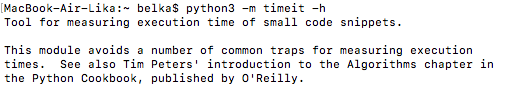

Аргумент **statement** работает в командной строке несколько иначе по срав­ нению c аналогичным аргументом конструктора Timer. Вместо того чтобы ис­ пользовать одну длинную строку, следует передавать каждую строку инструкций в качестве отдельного аргумента командной строки. Для создания отступов строк (например, в теле цикла) необходимо вставлять в строки пробелы, заключая их в кавычки.

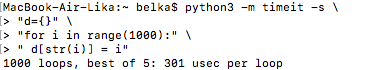

Также существует возможность определить функцию c более сложным кодом, а затем вызвать ее из командной строки.

In [ ]:
#timeit_setitem.py
def test_setitem(range_size=1000):
    l = [(str(x), x) for x in range(range_size)]
    d = {}
    for s, i in l:
        d[s] = i

Чтобы выполнить тест, следует передать код, импортирующий модули, и запу­ стить тестовую функцию.

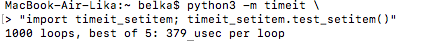

# **Venv**: создание виртуальных окружений

Настройка виртуальных окружений (сред) Python, управляемых модулем **venv**, обеспечивает установку пакетов и выполнение программ таким образом, что они изолируются от других пакетов, установленных в остальной части системы. Поскольку каждое окружение имеет собственный интерпретатор и каталог для установки пакетов, не составляет труда создать несколько окружений, сконфигу­ рированных c использованием различных комбинаций Python и версий пакетов на одном и том же компьютере.


# Создание окружения

В основном интерфейсе командной строки модуля **venv** используется возмож­ ность запуска основной функции модуля посредством указания параметра -m.

image.png

# **Содержимое виртуального окружения**


Каждое виртуальное окружение содержит каталог bin, в котором установлены локальный интерпретатор и исполняемые сценарии, каталог include для фай­ лов, связанных со сборкой С-расширений, и каталог lib c отдельным расположе­ нием site-packages для установки пакетов.

image.png

Каталог bin, заданный по умолчанию, содержит сценарии активизации для не­ скольких вариантов оболочки Unix. Их можно использовать для установки вирту­ ального окружения в каталоге, включенном в путь поиска командной оболочки, гарантируя тем самым, что оболочка будет выбирать программы, установленные в данном окружении. Несмотря иа то что активизация окружения для использова­ ния установленных в нем программ не является обязательной, этот прием может быть весьма полезным.

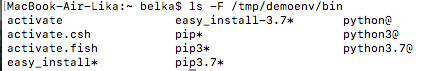

Вместо копирования исполняемых файлов наподобие интерпретатора исполь­ зуются символические ссылки, если они поддерживаются платформой. В таком окружении программа pip устанавливается в качестве локальной копии, однако интерпретатор является символической ссылкой.

# **Использование виртуальных окружений**

Как правило, виртуальные окружения применяются для выполнения различ­ ных версий программ или тестирования конкретной версии программы c различ­ ными версиями ее зависимостей. Например, прежде чем переходить от одной версии Sphinx к другой, целесообразно протестировать входные файлы докумен­ тации c использованием старой и новой версий. Для этого прежде всего необхо­ димо создать два виртуальных окружения.

image.png

Затем устанавливаются версии тестируемых инструментов.

image.png

image.png

Теперь различные версии **Sphinx** можно запускать из виртуальных окружений по отдельности для их тестирования c использованием одних и тех же входных файлов.

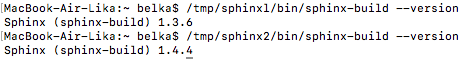

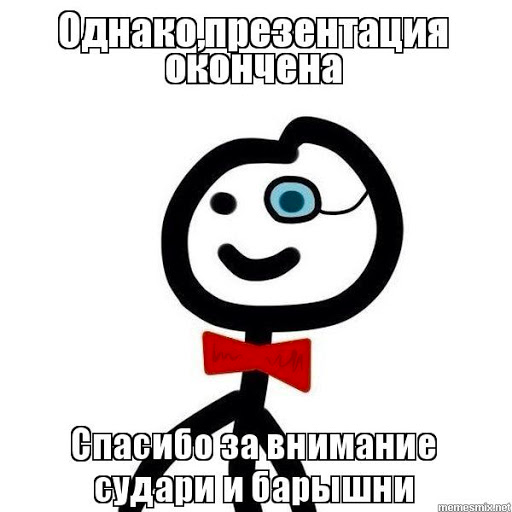

# **Задания для вас махарошие:**

1) Создать функцию factorial() и написать код, который будет рассчитывать факториал числа. Далее, с помошью функции run() создать отчет, который будет отображать время, затраченное на выполнение время.

2) Написать код, с помощью которого 10 раз будет выводиться "Hello world!" и время ее выполнения.

3) Создать свое виртуальное окружение myenv и просмотреть его содержимое.